In [1]:
## importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

#supressing warnings
warnings.filterwarnings('ignore')

## Load Dataset

In [2]:
#loading dataset into a dataframe object
df_cars = pd.read_csv('data-car-price-prediction.csv',index_col=[0])

#interpreting first 5 rows
df_cars.head()

,Brand,Model,Varient,Manufacture Year,Driven Kilometers,Fuel,Number of Owner,Body Type,Location,Price
0,Maruti,Zen,Estilo LXI,2011,"24,337km",Petrol,First Owner,Hatchback,Delhi,210499.0
1,Maruti,Alto,K10 VXI,2018,"5,198km",Petrol,First Owner,Hatchback,Delhi,343799.0
2,Maruti,Celerio,VXI AMT,2015,"27,739km",Petrol,First Owner,Hatchback,Delhi,371199.0
3,Hyundai,i20,SPORTZ 1.2 VTVT,2014,"25,187km",Petrol,First Owner,Hatchback,Delhi,360099.0
4,Maruti,S,PRESSO VXI PLUS,2020,"7,556km",Petrol,First Owner,Hatchback,Delhi,415999.0


## Data Analysis

In [3]:
#checking general information
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10083 entries, 0 to 10082
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              10083 non-null  object 
 1   Model              10083 non-null  object 
 2   Varient            10083 non-null  object 
 3   Manufacture Year   10083 non-null  int64  
 4   Driven Kilometers  10083 non-null  object 
 5   Fuel               10083 non-null  object 
 6   Number of Owner    10083 non-null  object 
 7   Body Type          10083 non-null  object 
 8   Location           10083 non-null  object 
 9   Price              10083 non-null  float64
dtypes: float64(1), int64(1), object(8)
memory usage: 866.5+ KB


#### Remarks:
- Dataset contains **10083 entries or records with 10 columns (9 feature and 1 target)**.
- Non-Null Count suggests, there are **no null values present** in dataset.
- Dataset contains **9 descrete features (7 are of object type and 1 is of int64 type)** while target **Price is of continueous type (float64)**.

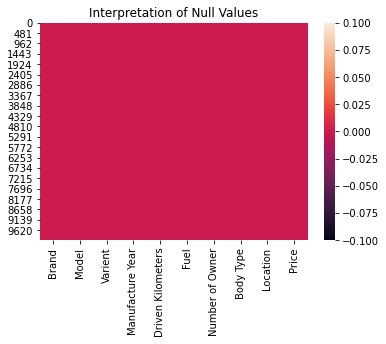

In [4]:
#interpreting null values using heatmap
plt.title("Interpretation of Null Values")
sns.heatmap(df_cars.isnull())
plt.show()

#### Remarks:
- There are **no null values present** in dataset.

### Checking feature `Brand`

In [5]:
#checking unique values
print("Total unique values:",df_cars["Brand"].nunique())
df_cars["Brand"].unique()

Total unique values: 34


array(['Maruti', 'Hyundai', 'Honda', 'Datsun', 'Renault', 'Volkswagen',
       'Toyota', 'Tata', 'Fiat', 'Ford', 'Chevrolet', 'Nissan', 'Skoda',
       'Mahindra', 'Mercedes', 'Audi', 'BMW', 'Ssangyong', 'Jeep',
       'Jaguar', 'Mitsubishi', 'Kia', 'Volvo', 'Mercedes-Benz', 'Mini',
       'MG', 'Land', 'Lexus', 'Porsche', 'Premier', 'Isuzu', 'Hummer',
       'Bentley', 'DC'], dtype=object)

#### Remarks:
- Data is in **descrete format**, therefore, it needs to be **converted into vector** before sending it for model training.

In [6]:
#checking the number of records available for each brand
brand_value_counts = df_cars["Brand"].value_counts()
brand_value_counts

Maruti           3795
Hyundai          1788
Honda             781
Toyota            747
Mahindra          447
Ford              349
Volkswagen        317
Mercedes-Benz     295
Renault           287
BMW               250
Audi              206
Tata              174
Nissan             79
Skoda              73
Chevrolet          72
Datsun             68
Land               67
Mercedes           50
Jaguar             38
Volvo              38
Kia                32
Jeep               25
MG                 23
Fiat               18
Mini               17
Porsche            15
Ssangyong           9
Mitsubishi          8
Lexus               5
Bentley             4
Isuzu               3
Hummer              1
Premier             1
DC                  1
Name: Brand, dtype: int64

#### Remarks:
- **Brands with single record can be removed** from the dataset as it does not has any impact on model training.

### Checking feature `Model`

In [7]:
#checking unique values
print("Total unique values:",df_cars["Model"].nunique())
df_cars["Model"].unique()

Total unique values: 275


array(['Zen', 'Alto', 'Celerio', 'i20', 'S', 'Swift', 'Brio', 'Grand',
       'Ritz', 'Redi', 'Kwid', 'A', 'Baleno', 'Elite', 'Polo', 'Wagon',
       'i10', 'Etios', 'Tiago', 'Jazz', 'Punto', 'Santro', 'Figo', 'Eon',
       'Nano', 'Beat', 'IGNIS', 'Glanza', 'Micra', 'Bolt', 'Fabia', 'New',
       'City', 'Amaze', 'Dzire', 'Ciaz', 'YARIS', 'Verna', 'Fiesta',
       'SX4', 'Scala', 'Jetta', 'Vento', 'Rapid', 'Xcent', 'Sunny',
       'Civic', 'Accord', 'Kuv100', 'Eeco', 'Ertiga', 'Ecosport',
       'Scorpio', 'WR-V', 'Creta', 'Vitara', 'Innova', 'Duster',
       'Terrano', 'VENUE', 'NUVOSPORT', 'Mobilio', 'TUV300', 'Thar',
       'XUV', 'XL6', 'Harrier', 'NEXON', 'Quanto', 'BR-V', 'Bolero',
       'Superb', 'Cruze', 'Benz', 'Corolla', 'A4', '3', 'A6', 'Camry',
       'Rexton', 'CRV', 'Fortuner', 'XUV500', 'Q3', 'Compass', 'X1',
       'Endeavour', 'Go', 'Sail', 'Spark', 'Indica', 'AURA', 'TIGOR',
       'Ameo', 'Zest', 'Indigo', 'Linea', 'Accent', 'Hexa', 'KUV', 'Xylo',
       'TRIBER', 

#### Remarks:
- Data is in **descrete format**, therefore, needs to be **converted into vectors** before sending for model training.

In [8]:
#checking number of records for each model
model_value_counts = df_cars["Model"].value_counts()
model_value_counts

Swift                 1229
Alto                   485
i20                    360
Innova                 270
i10                    263
                      ... 
X                        1
A5                       1
Pulse                    1
Laura                    1
7 Series 2002-2005       1
Name: Model, Length: 275, dtype: int64

#### Remarks:
- **Models with single record can be removed** from the dataset as it does not has any impact on model training.

### Checking feature `Varient`

In [9]:
#checking unique values
print("Total unique values:", df_cars["Varient"].nunique())
df_cars["Varient"].unique()

Total unique values: 1845


array(['Estilo LXI', 'K10 VXI', 'VXI AMT', ..., 'CNG VXI BSIV',
       '2.5 VX 8 STR BSIV', '2.5 EV CS 7 STR BSIV'], dtype=object)

#### Remarks:
- Data is in **descrete format** and needs to be **converted into vector** before sending it for model training.

In [10]:
#checking number of records for each Varient
varient_value_counts = df_cars["Varient"].value_counts()
varient_value_counts

VDI                   386
VXI                   292
LXI                   230
Dzire VDI BS IV       214
VDI ABS               145
                     ... 
AMBIENTE 1.2 MPI        1
W11 Option              1
E8 ABS Airbag BSIV      1
Era 1.2                 1
2.8 4WD MT BSIV         1
Name: Varient, Length: 1845, dtype: int64

#### Remarks:
- **Varients with single record can be removed** from the dataset as it does not has any impact on model training.

### Checking feature `Manufacture Year`

In [11]:
#checking unique values
print("Total unique values:",df_cars["Manufacture Year"].nunique())
print(df_cars["Manufacture Year"].unique())
print("Minimum Year: ", df_cars["Manufacture Year"].min())
print("Maximum Year: ", df_cars["Manufacture Year"].max())

Total unique values: 23
[2011 2018 2015 2014 2020 2013 2017 2019 2010 2012 2016 2009 2008 2007
 2021 2003 2006 2004 2005 1998 2000 2001 2002]
Minimum Year:  1998
Maximum Year:  2021


#### Remarks:
- Data can be treated as of continuous type.
- Oldest car is from year 1998 and newest car is from year 2021.

### Checking feature `Driven Kilometers`

In [12]:
#interpreting data
df_cars["Driven Kilometers"]

0            24,337km
1             5,198km
2            27,739km
3            25,187km
4             7,556km
             ...     
10078    1,83,000 kms
10079      70,000 kms
10080    2,20,000 kms
10081    1,00,000 kms
10082      58,000 kms
Name: Driven Kilometers, Length: 10083, dtype: object

#### Remarks:
- Data is present in the form of **object type which needs to be extracted and converted into continuous type**.

### Checking feature `Fuel`

In [13]:
#checking for unique values
print("Total unique values: ",df_cars["Fuel"].nunique())
df_cars["Fuel"].unique()

Total unique values:  5


array(['Petrol', 'Diesel', 'Petrol + CNG', 'CNG', 'LPG'], dtype=object)

In [14]:
#checking number of records for each Fuel type
fuel_value_counts = df_cars["Fuel"].value_counts()
fuel_value_counts

Petrol          5105
Diesel          4728
Petrol + CNG     197
CNG               47
LPG                6
Name: Fuel, dtype: int64

#### Remarks:
- Data is in **descrete** form and needs to be **converted into vectors** before sending it for model training.

### Checking feature `Number of Owner`

In [15]:
#checking for unique values
print("Total unique values: ",df_cars["Number of Owner"].nunique())
df_cars["Number of Owner"].unique()

Total unique values:  6


array(['First Owner', 'Second Owner', 'Third Owner', 'Fourth Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [16]:
#checking number of records for each Number of Owner
number_of_owner_value_counts = df_cars["Number of Owner"].value_counts()
number_of_owner_value_counts

First Owner             7818
Second Owner            1977
Third Owner              256
Fourth Owner              20
Fourth & Above Owner      10
Test Drive Car             2
Name: Number of Owner, dtype: int64

#### Remarks:
- Data is in **descrete** form and needs to be **converted into vectors** before sending it for model training.

### Checking feature `Body Type`

In [17]:
#checking for unique values
print("Total unique values: ",df_cars["Body Type"].nunique())
df_cars["Body Type"].unique()

Total unique values:  10


array(['Hatchback', 'Sedan', 'SUV', 'Luxury Sedan', 'Luxury SUV',
       'Luxury', 'Minivan', 'Super Luxury', 'MUV', 'Coupe'], dtype=object)

In [18]:
#checking number of records for each Body Type
body_type_value_counts = df_cars["Body Type"].value_counts()
body_type_value_counts

Hatchback       4854
SUV             2169
Sedan           1614
Luxury           457
MUV              448
Luxury SUV       190
Luxury Sedan     180
Minivan          107
Coupe             36
Super Luxury      28
Name: Body Type, dtype: int64

#### Remarks:
- Data is in **descrete** form and needs to be **converted into vectors** before sending it for model training.

### Checking feature `Location`

In [19]:
#checking total unique values
print("Total unique values: ",df_cars["Location"].nunique())
df_cars["Location"].unique()

Total unique values:  10


array(['Delhi', 'Noida', 'Gurgaon', 'Mumbai', 'Pune', 'Ahmedabad',
       'Bangalore', 'Chennai', 'Hyderabad', 'Delhi NCR'], dtype=object)

In [20]:
#checking number of records for each Location
location_value_counts = df_cars["Location"].value_counts()
location_value_counts

Delhi NCR    1747
Mumbai       1318
Delhi        1291
Noida        1085
Gurgaon      1080
Pune         1051
Ahmedabad     884
Bangalore     850
Hyderabad     421
Chennai       356
Name: Location, dtype: int64

#### Remarks:
- Data is in **descrete** form and needs to be **converted to vectors** before sending it for model training.

### Checking target feature `Price`

In [21]:
#interpreting
print(f"Maximum Price: {df_cars['Price'].max()}  |  Minimum Price: {df_cars['Price'].min()}")
df_cars["Price"]

Maximum Price: 19000000.0  |  Minimum Price: 40000.0


0        210499.0
1        343799.0
2        371199.0
3        360099.0
4        415999.0
           ...   
10078    525000.0
10079    650000.0
10080    495000.0
10081    260000.0
10082    395000.0
Name: Price, Length: 10083, dtype: float64

#### Remarks:
- Data is in **continuous form** therefore, it is a **Regression Problem**.
- Minimum price of car is 40000 and maximum price is 19000000.

## Data Cleansing

### Cleaning feature `Varient`

In [22]:
df = None
#removing varients which has single record in dataset
df = df_cars[~df_cars["Varient"].isin(varient_value_counts[varient_value_counts==1].index)]

#interpreting shape of dataset
df.shape

(9454, 10)

### Cleaning feature `Brand`

In [23]:
#removing brands which has single record in dataset
brand_value_counts = df["Brand"].value_counts()
df = df[~df["Brand"].isin(brand_value_counts[brand_value_counts==1].index)]

#interpreting shape of dataset
df.shape

(9454, 10)

### Cleaning feature `Model`

In [24]:
#removing models which has single record in dataset
model_value_counts = df["Model"].value_counts()
df = df[~df["Model"].isin(model_value_counts[model_value_counts==1].index)]

#interpreting shape of dataset
df.shape

(9442, 10)

### Cleaning feature `Driven Kilometers`

In [25]:
#extracted numbers from each record and storing it as float64 type
df["Driven Kilometers"] = df["Driven Kilometers"].str.replace('[^0-9.]','').astype('float64')

#interpreting first 5 rows
df.head()

,Brand,Model,Varient,Manufacture Year,Driven Kilometers,Fuel,Number of Owner,Body Type,Location,Price
0,Maruti,Zen,Estilo LXI,2011,24337.0,Petrol,First Owner,Hatchback,Delhi,210499.0
1,Maruti,Alto,K10 VXI,2018,5198.0,Petrol,First Owner,Hatchback,Delhi,343799.0
2,Maruti,Celerio,VXI AMT,2015,27739.0,Petrol,First Owner,Hatchback,Delhi,371199.0
3,Hyundai,i20,SPORTZ 1.2 VTVT,2014,25187.0,Petrol,First Owner,Hatchback,Delhi,360099.0
4,Maruti,S,PRESSO VXI PLUS,2020,7556.0,Petrol,First Owner,Hatchback,Delhi,415999.0


### Renaming columns

In [26]:
#rename columns
df.rename(columns={"Manufacture Year":"ManufactureYear",
                   "Driven Kilometers":"DrivenKilometers",
                   "Number of Owner":"NumberOfOwner",
                   "Body Type":"BodyType"},inplace=True)

#interpreting first 5 rows
df.head()

,Brand,Model,Varient,ManufactureYear,DrivenKilometers,Fuel,NumberOfOwner,BodyType,Location,Price
0,Maruti,Zen,Estilo LXI,2011,24337.0,Petrol,First Owner,Hatchback,Delhi,210499.0
1,Maruti,Alto,K10 VXI,2018,5198.0,Petrol,First Owner,Hatchback,Delhi,343799.0
2,Maruti,Celerio,VXI AMT,2015,27739.0,Petrol,First Owner,Hatchback,Delhi,371199.0
3,Hyundai,i20,SPORTZ 1.2 VTVT,2014,25187.0,Petrol,First Owner,Hatchback,Delhi,360099.0
4,Maruti,S,PRESSO VXI PLUS,2020,7556.0,Petrol,First Owner,Hatchback,Delhi,415999.0


### Converting all the object type features to lower case

In [27]:
for col in df.columns[df.dtypes==object]:
    df[col]=df[col].str.lower()
    
#interpreting first 5 rows
df.head()

,Brand,Model,Varient,ManufactureYear,DrivenKilometers,Fuel,NumberOfOwner,BodyType,Location,Price
0,maruti,zen,estilo lxi,2011,24337.0,petrol,first owner,hatchback,delhi,210499.0
1,maruti,alto,k10 vxi,2018,5198.0,petrol,first owner,hatchback,delhi,343799.0
2,maruti,celerio,vxi amt,2015,27739.0,petrol,first owner,hatchback,delhi,371199.0
3,hyundai,i20,sportz 1.2 vtvt,2014,25187.0,petrol,first owner,hatchback,delhi,360099.0
4,maruti,s,presso vxi plus,2020,7556.0,petrol,first owner,hatchback,delhi,415999.0


### Changing data type of Manufacture Year from int64 to float64

In [28]:
df.ManufactureYear = df.ManufactureYear.astype('float64')

#interpreting data type of dataset
df.dtypes

Brand                object
Model                object
Varient              object
ManufactureYear     float64
DrivenKilometers    float64
Fuel                 object
NumberOfOwner        object
BodyType             object
Location             object
Price               float64
dtype: object

## Summary of Stats

In [29]:
#summary of dataset
df.describe()/100000

,ManufactureYear,DrivenKilometers,Price
count,0.094420,0.094420,0.094420
mean,0.020146,0.625580,7.661991
std,0.000029,0.548495,10.534238
min,0.020000,0.006740,0.400000
25%,0.020120,0.334310,3.058990
50%,0.020150,0.567950,4.401495
75%,0.020170,0.813800,7.433990
max,0.020210,36.000000,150.000000


#### Remarks:
- Dataset consists of cars from year 2000 to 2021.
- Minimum driven car is 674 kilometers while maximum is 3600000.
- Minimum price of a car is 40000 and maximum is 15000000.

## Exploratory Data Analysis (EDA)

### Univariate Analysis

#### *1. DisPlot*

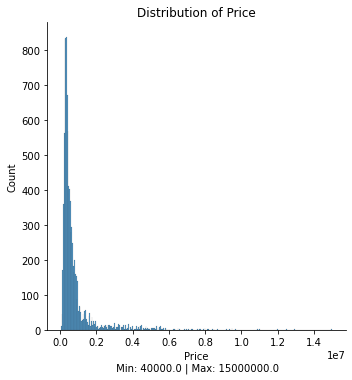

In [30]:
#checking target Price using displot
sns.displot(df.Price,kind='hist')
plt.title("Distribution of Price")
mi = df.Price.min()
ma = df.Price.max()
plt.xlabel(f"Price\n Min: {mi} | Max: {ma}")
plt.show()

#### Remarks:
- Most of car **price lies between 40000 to 2000000**.
- **Mininum** price of car is **40000** and **Maximum** price is **15000000**.

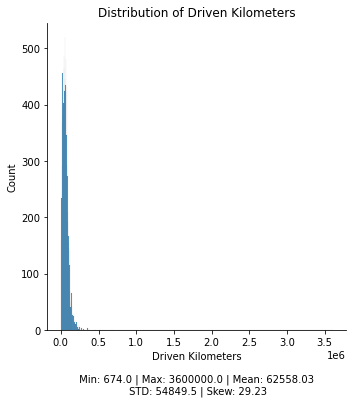

In [31]:
#checking feature DrivenKilometers using displot
sns.displot(df.DrivenKilometers,kind='hist')
plt.title("Distribution of Driven Kilometers")
mi = df.DrivenKilometers.min()
ma = df.DrivenKilometers.max()
me = round(df.DrivenKilometers.mean(),2)
st = round(df.DrivenKilometers.std(),2)
sk = round(df.DrivenKilometers.skew(),2)
plt.xlabel(f"Driven Kilometers\n\n Min: {mi} | Max: {ma} | Mean: {me} \n STD: {st} | Skew: {sk}")
plt.show()

#### Remarks:
- Data is **not distributed normally** or not in bell-curve.
- Data is **highly spread**.
- Data is **positively skewed** and needs to be treated accordingly before providing to for model training.
- Mininum driven kilometer is 674 while maximum is 36 lakh.

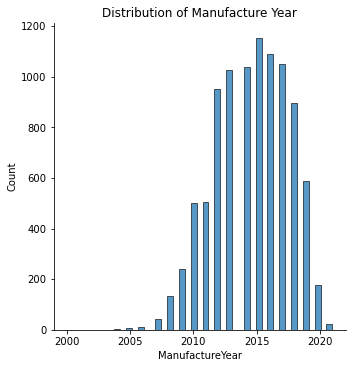

In [32]:
#checking feature Manufacture Year
sns.displot(df.ManufactureYear,kind='hist')
plt.title("Distribution of Manufacture Year")
plt.show()

#### Remarks:
- Most of the cars are from year 2012 to 2019.
- Maximum number of cars are of manufacture year 2015.
- Minimum number of cars are of manufacture year 2000.

#### *2. CountPlot*

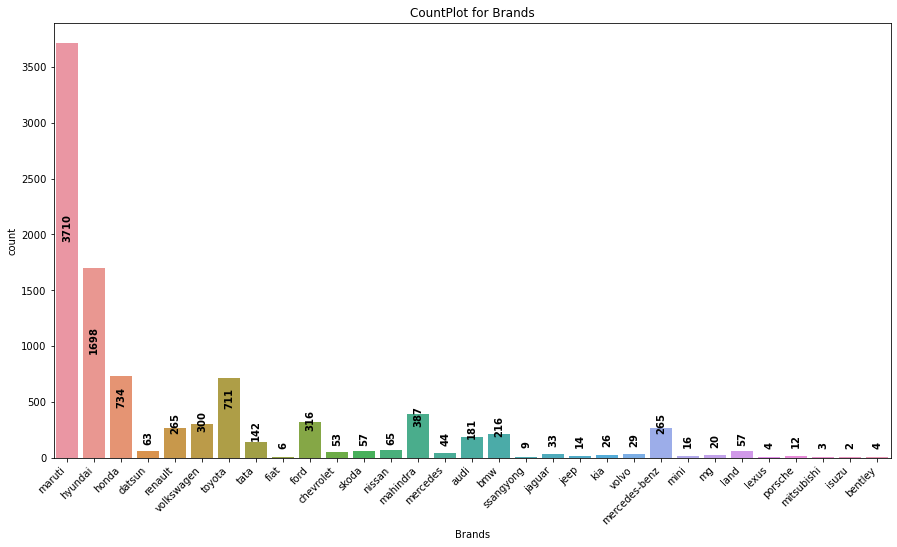

In [33]:
#checking feature brand using countplot
plt.figure(figsize=(15,8))
plt.title("CountPlot for Brands")
axs = sns.countplot(data=df,x='Brand')
i = 0
for x in axs.patches:
    h = x.get_height()
    j = h/2 + 100
    plt.text(i,j,h,ha='center',rotation=90,fontweight='bold')
    i += 1

plt.xticks(rotation=45,ha="right")
plt.xlabel("Brands")
plt.show()

#### Remarks:
- Most of the records are of brand **maruti, hyundai, honda, toyota, ford, mahindra & volkswagen**.
- Maximum number of records are of brand **maruti**.
- Minimum number of records are of brand **isuzu**.

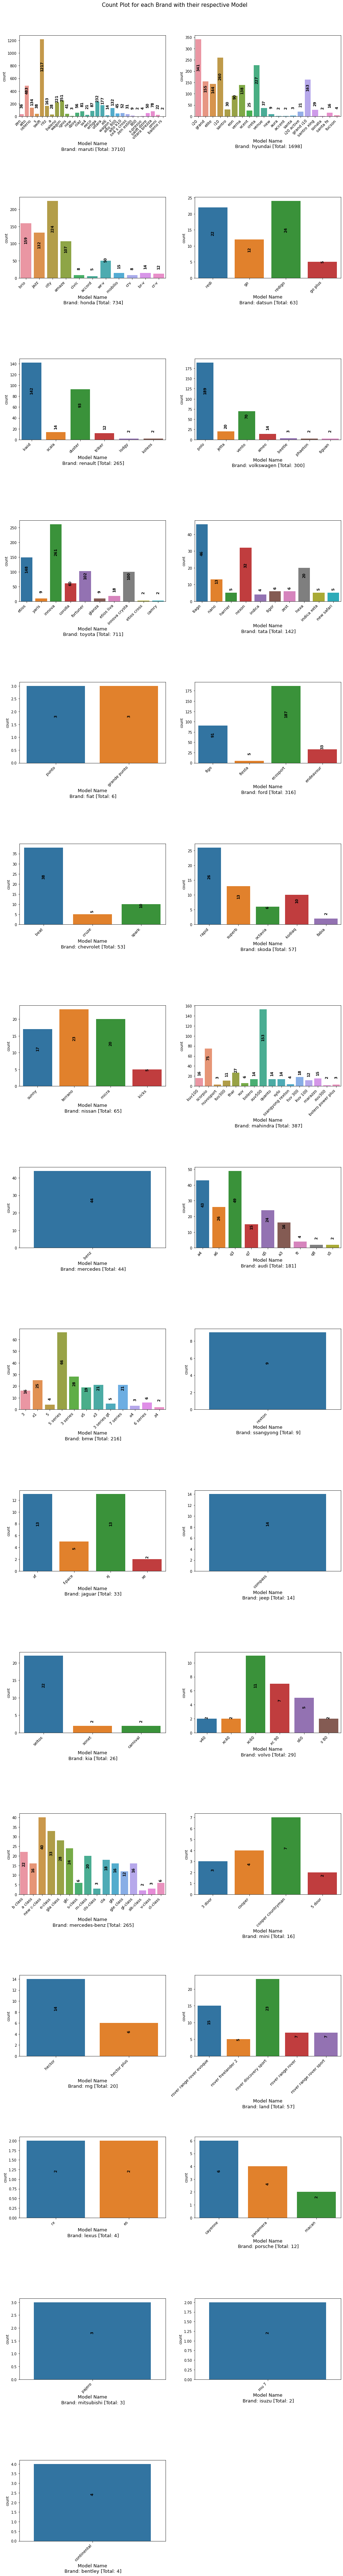

In [34]:
#checking feature Brand and Model using countplot
brands = df.Brand.unique()
cols = 2
rows = len(brands)//2
if len(brands) % 2 != 0:
    rows += 1
  
fig = plt.figure(figsize=(16,8*rows))
plt.subplots_adjust(hspace=1,wspace=0.2)
fig.suptitle("Count Plot for each Brand with their respective Model",y=0.89,fontsize=15)
p=1
for brand in brands:
    axs = fig.add_subplot(rows,cols,p)
    sns.countplot(data=df[df.Brand==brand],x="Model",ax=axs)
    i = 0
    mh = 0
    for x in axs.patches:
        if mh < x.get_height():
            mh = x.get_height()
            
    for x in axs.patches:
        h = x.get_height()
        j = (h/2)+(mh/10)
        plt.text(i,j,h,rotation=90,ha='center',fontweight='bold')
        i += 1
        
    axs.set_xlabel(f"Model Name\n Brand: {brand} [Total: {len(df[df.Brand==brand])}]",fontsize=13)
    model_labels = df[df.Brand==brand].Model.unique()
    axs.set_xticklabels(labels=model_labels,rotation=45,ha="right",fontsize=11)
    p += 1

plt.show()

#### Remarks:
1. **`for brand maruti:`**
    - Most of the records are for model **swift, alto, wagon, ertiga, baleno, vitara, ritz, celerio & wagon r**.
    - Maximum number of records are for model **swift**.
    - Minimum number of records are for model **800 & baleno rs**.


2. **`for brand hyundai:`**
    - Most of the records are for model **i20, i10, creta, grand i10, grand, elite & verna**.
    - Maximum number of records are for model **i20**.
    - Minimum number of records are for model **aura, accent & sonata**.
    

3. **`for brand honda:`**
    - Most of the records are for model **city, brio, jazz & amaze**.
    - Maximum number of records are for model **city**.
    - Minimum number of records are for model **accord**.


4. **`for brand datsun:`**
    - Most of the records are for model **redigo & redi**.
    - Maximum number of records are for model redigo
    - Minimum number of records are for model **go plus**.


5. **`for brand renault:`**
    - Most of the records are for model ** kwid & duster **.
    - Maximum number of records are for model ** kwid **.
    - Minimum number of records are for model ** lodgy & koleos **.


5. **`for brand volkswagen:`**
    - Most of the records are for model ** polo & vento **.
    - Maximum number of records are for model ** polo **.
    - Minimum number of records are for model ** phaeton & tiguan **.


6. **`for brand toyota:`**
    - Most of the records are for model ** innova, etios, fortuner & innova crysta **.
    - Maximum number of records are for model ** innova **.
    - Minimum number of records are for model ** etios cross & camry **.


7. **`for brand tata:`**
    - Most of the records are for model ** tiago, nexon & hexa **.
    - Maximum number of records are for model ** tiago**.
    - Minimum number of records are for model ** indica **.


8. **`for brand fiat:`**
    - Equal number of records are there for all model.


9. **`for brand ford:`**
    - Most of the records are for model ** ecosport & figo **.
    - Maximum number of records are for model ** ecosport **.
    - Minimum number of records are for model ** endeavour **.


10. **`for brand chevrolet:`**
    - Most of the records are for model ** beat & spark **.
    - Maximum number of records are for model ** beat **.
    - Minimum number of records are for model ** cruze **.


11. **`for brand skoda:`**
    - Most of the records are for model ** rapid, superb & kodiaq **.
    - Maximum number of records are for model ** rapid **.
    - Minimum number of records are for model ** fabia **.


12. **`for brand nissan:`**
    - Most of the records are for model ** terrano, micra & sunny **.
    - Maximum number of records are for model ** terrano **.
    - Minimum number of records are for model ** kicks **.


13. **`for brand mahindra:`**
    - Most of the records are for model ** xuv500, scorpio & thar **.
    - Maximum number of records are for model ** xuv500 **.
    - Minimum number of records are for model ** xuv300 **.


14. **`for brand mercedes:`**
    - Has only one model named benz in the dataset.


15. **`for brand audi:`**
    - Most of the records are for model ** q3, a4, a6 & q5 **.
    - Maximum number of records are for model ** q3 **.
    - Minimum number of records are for model ** q8 & s5 **.


16. **`for brand bmw:`**
    - Most of the records are for model ** 5 series, 3 series, x1, x3 & 7 series **.
    - Maximum number of records are for model ** 5 series **.
    - Minimum number of records are for model ** z4 **.


17. **`for brand ssangyong:`**
    - Has only one model named rexton in the dataset.


18. **`for brand jaguar:`**
    - Most of the records are for model ** xf & xj **.
    - Maximum number of records are for model ** xf & xj**.
    - Minimum number of records are for model ** xe **.


19. **`for brand jeep:`**
    - Has only one model named compass in the dataset.


20. **`for brand kia:`**
    - Maximum number of records are for model ** seltos **.
    - Minimum number of records are for model ** sonet & carnival **.


21. **`for brand volvo:`**
    - Most of the records are for model ** xc60, xc 90 & s60 **.
    - Maximum number of records are for model ** xc60 **.
    - Minimum number of records are for model ** v40, xc40 & s 80 **.


22. **`for brand mercedes-benz:`**
    - Most of the records are for model ** new c-class, e-class, gla class, glc, b class, m-class & cla **.
    - Maximum number of records are for model ** new c-class **.
    - Minimum number of records are for model ** slk-class **.


23. **`for brand mini:`**
    - Maximum number of records are for model ** cooper countryman **.
    - Minimum number of records are for model ** 3 door **.


24. **`for brand mg:`**
    - Maximum number of records are for model ** hector **.
    - Minimum number of records are for model ** hector plus **.


25. **`for brand land:`**
    - Most of the records are for model ** rover discovery sport & rover range rover evoque **.
    - Maximum number of records are for model ** rover discovery sport**.
    - Minimum number of records are for model ** rover freelander 2 **.


26. **`for brand lexus:`**
    - All models have equal number of records.


27. **`for brand porsche:`**
    - Maximum number of records are for model ** cayenne **.
    - Minimum number of records are for model ** macan **.


28. **`for brand mitsubishi:`**
    - Has only one model named pajero.


29. **`for brand isuzu:`**
    - Has only one model named mu 7.


30. **`for brand bentley:`**
    - Has only one model named continental.

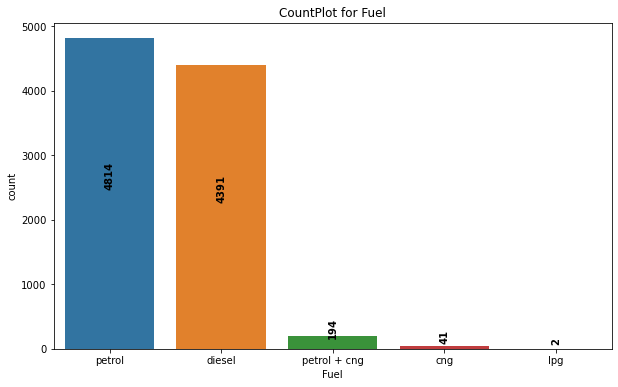

In [35]:
#checking feature Fuel using countplot
plt.figure(figsize=(10,6))
plt.title("CountPlot for Fuel")
axs = sns.countplot(data=df,x='Fuel')
i = 0
for x in axs.patches:
    h = x.get_height()
    j = h/2 + 100
    plt.text(i,j,h,ha='center',rotation=90,fontweight='bold')
    i += 1
    
plt.show()

#### Remarks:
- Most of the records are for **petrol and diesel** engine type cars.
- Maximum number of cars are of **petrol** engine.
- Minimum number of cars are of **lpg** engine.

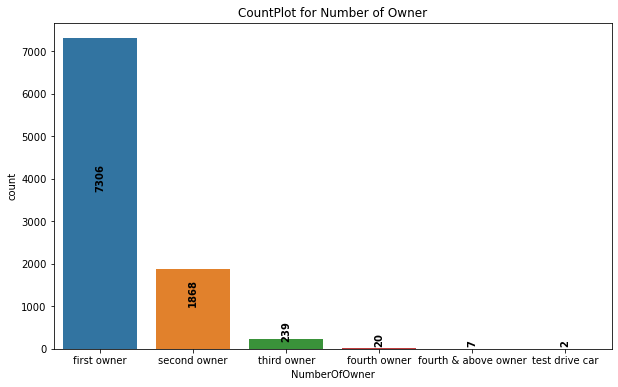

In [36]:
#checking feature Number of Owner using countplot
plt.figure(figsize=(10,6))
plt.title("CountPlot for Number of Owner")
axs = sns.countplot(data=df,x='NumberOfOwner')
i = 0
for x in axs.patches:
    h = x.get_height()
    j = h/2 + 100
    plt.text(i,j,h,ha='center',rotation=90,fontweight='bold')
    i += 1
    
plt.show()

#### Remarks:
- Most of the records are for **first and second** owner.
- Maximum number of cars are of **first** owner.
- Minimum number of cars are of **test driver**.

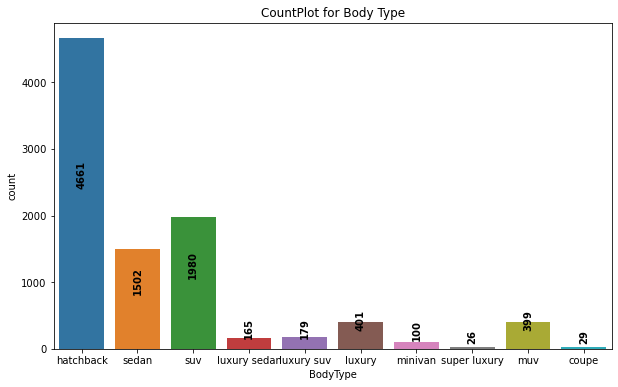

In [37]:
#checking feature Body Type using countplot
plt.figure(figsize=(10,6))
plt.title("CountPlot for Body Type")
axs = sns.countplot(data=df,x='BodyType')
i = 0
for x in axs.patches:
    h = x.get_height()
    j = h/2 + 100
    plt.text(i,j,h,ha='center',rotation=90,fontweight='bold')
    i += 1
    
plt.show()

#### Remarks:
- Most of the records are for **hatchback, suv, sedan, luxury & muv**.
- Maximum number of cars are of **hatchback** owner.
- Minimum number of cars are of **super luxury**.

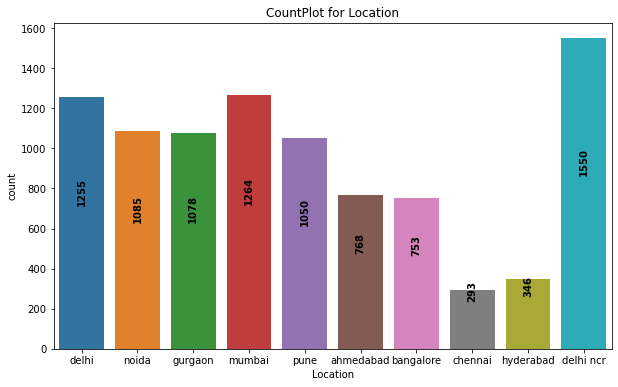

In [38]:
#checking feature Location using countplot
plt.figure(figsize=(10,6))
plt.title("CountPlot for Location")
axs = sns.countplot(data=df,x='Location')
i = 0
for x in axs.patches:
    h = x.get_height()
    j = h/2 + 100
    plt.text(i,j,h,ha='center',rotation=90,fontweight='bold')
    i += 1
    
plt.show()

#### Remarks:
- Most of the records are for **delhi ncr, delhi, mumbai, noida, gurgaon & pune**.
- Maximum number of cars are of **delhi ncr**.
- Minimum number of cars are of **chennai**.

### 2. Bivariate Analysis

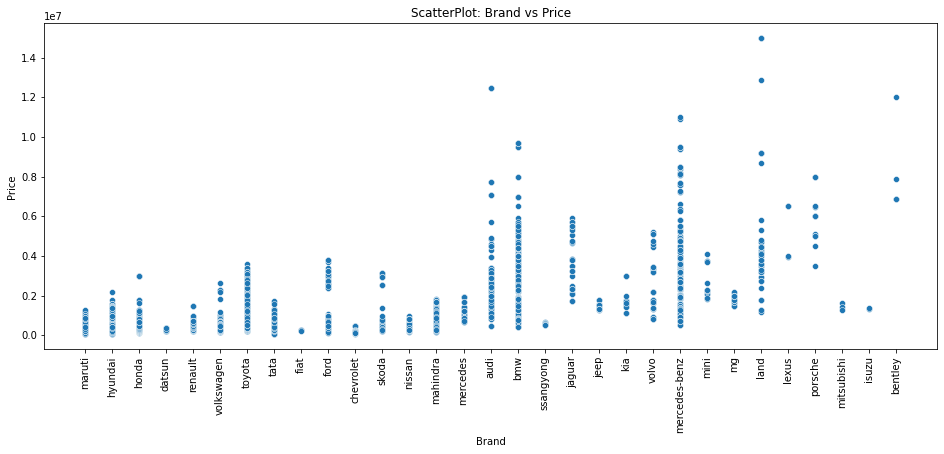

In [39]:
#checking relationship between Brand and Price
plt.figure(figsize=(16,6))
sns.scatterplot(data=df,x='Brand',y='Price')
plt.xticks(rotation=90)
plt.title("ScatterPlot: Brand vs Price")
plt.show()

#### Remarks:
- Most of the car price ranges from 40000 to 2000000.
- **Maruti** brand car **price ranges from 40000 to 1500000** (aproximately).
- **Hyundai** brand car **price ranges from 40000 to 2200000** (aproximately).
- **Honda** brand car **price ranges from 40000 to 3000000** (aproximately).
- **Datsun** brand car **price ranges from 100000 to 500000** (aproximately).
- **Renault** brand car **price ranges from 80000 to 1800000** (aproximately).
- **Volkswagen** brand car **price ranges from 100000 to 2500000** (aproximately).
- **Toyota** brand car **price ranges from 100000 to 3800000** (aproximately).
- **Tata** brand car **price ranges from 40000 to 1800000** (aproximately).
- **Fiat** brand car **price ranges from 400000 to 500000** (aproximately).
- **Ford** brand car **price ranges from 300000 to 4000000** (aproximately).
- **Chevrolet** brand car **price ranges from 100000 to 500000** (aproximately).
- **Skoda** brand car **price ranges from 400000 to 3500000** (aproximately).
- **Nissan** brand car **price ranges from 400000 to 1200000** (aproximately).
- **Mahindra** brand car **price ranges from 400000 to 1800000** (aproximately).
- **Mercedes** brand car **price ranges from 1000000 to 2000000** (aproximately).
- **Audi** brand car **price ranges from 400000 to 13000000** (aproximately).
- **BMW** brand car **price ranges from 400000 to 10000000** (aproximately).
- **ssangyong** brand car **price ranges from 400000 to 500000** (aproximately).
- **Jaguar** brand car **price ranges from 1200000 to 5800000** (aproximately).
- **Jeep** brand car **price ranges from 1000000 to 1500000** (aproximately).
- **Kia** brand car **price ranges from 1000000 to 2400000** (aproximately).
- **Volvo** brand car **price ranges from 8000000 to 4500000** (aproximately).
- **Mercedes-Benz** brand car **price ranges from 600000 to 12000000** (aproximately).
- **Mini** brand car **price ranges from 1800000 to 3800000** (aproximately).
- **MG** brand car **price ranges from 1200000 to 2000000** (aproximately).
- **Land** brand car **price ranges from 1000000 to 16000000** (aproximately).
- **Lexus** brand car **price ranges from 4000000 to 6200000** (aproximately).
- **Porsche** brand car **price ranges from 3000000 to 7200000** (aproximately).
- **Mitsubishi** brand car **price ranges from 1200000 to 1500000** (aproximately).
- **Isuzu** brand car **price ranges from 1200000 to 1400000** (aproximately).
- **Bentley** brand car **price ranges from 6000000 to 12000000** (aproximately).

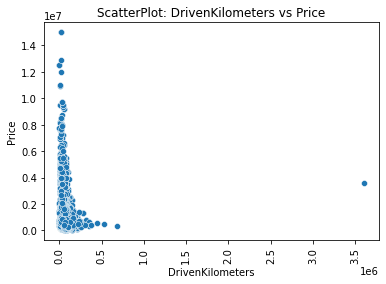

In [40]:
#Checking relationship between DrivenKilometers and Price
sns.scatterplot(data=df,x='DrivenKilometers',y='Price')
plt.xticks(rotation=90)
plt.title("ScatterPlot: DrivenKilometers vs Price")
plt.show()

#### Remarks: 
- **Price decreases as the Driven Kilometers increases.**

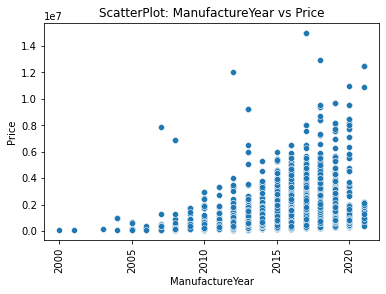

In [41]:
#Checking relationship between Manufacture Year and Price
sns.scatterplot(data=df,x='ManufactureYear',y='Price')
plt.xticks(rotation=90)
plt.title("ScatterPlot: ManufactureYear vs Price")
plt.show()

#### Remarks:
- **Price increases as the number of year increases, i.e., newer the car higher the price.**

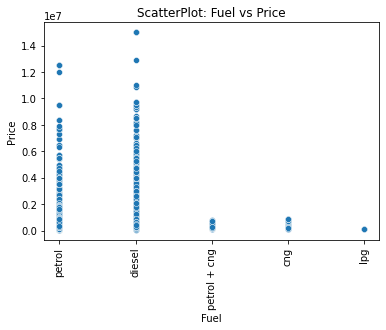

In [42]:
#Checking relationship between Fuel and Price
sns.scatterplot(data=df,x='Fuel',y='Price')
plt.xticks(rotation=90)
plt.title("ScatterPlot: Fuel vs Price")
plt.show()

#### Remarks:
- Price of **petrol and diesel cars are higher** as compared to the price of petrol+cng, cng and lpg.

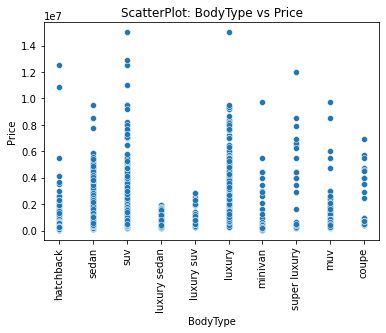

In [43]:
#Checking relationship between Body Type and Price
sns.scatterplot(data=df,x='BodyType',y='Price')
plt.xticks(rotation=90)
plt.title("ScatterPlot: BodyType vs Price")
plt.show()

#### Remarks:
- Price of **SUV and Luxury are on higher side** as compared to others while Price of luxury sedan and luxury suv are on lower side.

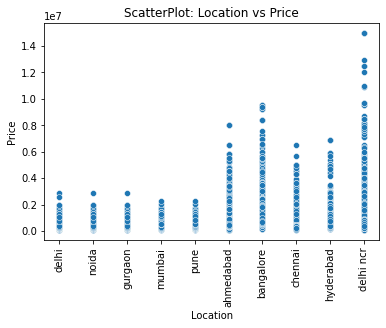

In [44]:
#Checking relationship between Location and Price
sns.scatterplot(data=df,x='Location',y='Price')
plt.xticks(rotation=90)
plt.title("ScatterPlot: Location vs Price")
plt.show()

#### Remarks:
- Price of car in delhi ncr ranges from as low as 40000 to as high as 13000000. Similerly in bangalore it ranges from 80000 to 9000000, in ahmedabad it ranges from 40000 to 8000000, in hyderabad it ranges from 80000 to 7000000 and in chennai it ranges from 80000 to 6000000 while in all other location it ranges from 40000 to 3000000.

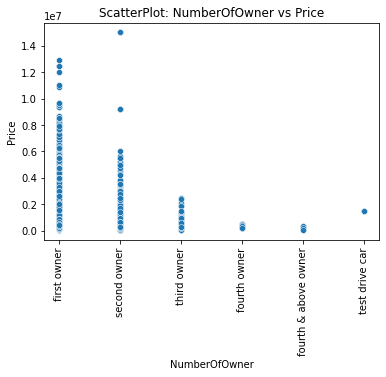

In [45]:
#Checking relationship between Number of Owner and Price
sns.scatterplot(data=df,x='NumberOfOwner',y='Price')
plt.xticks(rotation=90)
plt.title("ScatterPlot: NumberOfOwner vs Price")
plt.show()

#### Remarks:
- **As the number of owner increases, price of car decreases.**

### 3. Multivariate Analysis

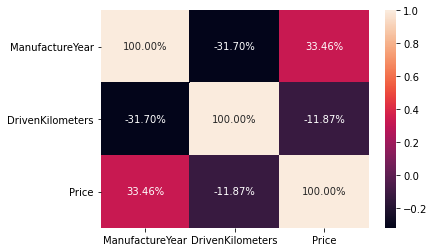

In [46]:
#checking the correlation of continuous features with Price using heatmap
sns.heatmap(df.corr(),annot=True,fmt=".2%")
plt.show()

#### Remarks:
- **Manufacture Year is positively good correlated to Price**.
- **Driven Kilometers is negatively correlated to Price**.

## EDA Concluding Remarks:
>Starting with **univariate analysis**, with the help of **distplot**, it was found that the minimum price of a car in the dataset is 40,000 while maximum is 1.5 Crore. It was also found that the data is positively skewed in Driven Kilometers and in Manufacture Year, the oldest car is of year 2000 and the newest car is of year 2021. Moving further with **countplot**, it was found that the most of the records in the dataset are of Maruti, Hyundai, Honda, Toyota, Ford, Mahindra & Volkswagen. Also, the maximum number of records are of Maruti and minimum numbers are for Isuzu. Also, with **bivariate analysis**, with the help of **scatterplot**, it was found that **Maruti** brand car price ranges from 40000 to 1500000 (aproximately), **Hyundai** brand car price ranges from 40000 to 2200000 (aproximately), **Honda** brand car price ranges from 40000 to 3000000 (aproximately), **Datsun** brand car price ranges from 100000 to 500000 (aproximately), **Renault** brand car price ranges from 80000 to 1800000 (aproximately), **Volkswagen** brand car price ranges from 100000 to 2500000 (aproximately), **Toyota** brand car price ranges from 100000 to 3800000 (aproximately), **Tata** brand car price ranges from 40000 to 1800000 (aproximately), **Fiat** brand car price ranges from 400000 to 500000 (aproximately), **Ford** brand car price ranges from 300000 to 4000000 (aproximately), **Chevrolet** brand car price ranges from 100000 to 500000 (aproximately), **Skoda** brand car price ranges from 400000 to 3500000 (aproximately), **Nissan** brand car price ranges from 400000 to 1200000 (aproximately), **Mahindra** brand car price ranges from 400000 to 1800000 (aproximately), **Mercedes** brand car price ranges from 1000000 to 2000000 (aproximately), **Audi** brand car price ranges from 400000 to 13000000 (aproximately), **BMW** brand car price ranges from 400000 to 10000000 (aproximately), **Ssangyong** brand car price ranges from 400000 to 500000 (aproximately), **Jaguar** brand car price ranges from 1200000 to 5800000 (aproximately), **Jeep** brand car price ranges from 1000000 to 1500000 (aproximately), **Kia** brand car price ranges from 1000000 to 2400000 (aproximately), **Volvo** brand car price ranges from 8000000 to 4500000 (aproximately), **Mercedes-Benz** brand car price ranges from 600000 to 12000000 (aproximately), **Mini** brand car price ranges from 1800000 to 3800000 (aproximately), **MG** brand car price ranges from 1200000 to 2000000 (aproximately), **Land** brand car price ranges from 1000000 to 16000000 (aproximately), **Lexus** brand car price ranges from 4000000 to 6200000 (aproximately), **Porsche** brand car price ranges from 3000000 to 7200000 (aproximately), **Mitsubishi** brand car price ranges from 1200000 to 1500000 (aproximately), **Isuzu** brand car price ranges from 1200000 to 1400000 (aproximately) and **Bentley** brand car price ranges from 6000000 to 12000000 (aproximately). It was also found that **as the driven kilometers increases, price of car decreases** and **as the number of years increases, price also increases.** Also, price of **petrol and diesel cars are higher** as compared to the price of petrol+cng, cng and lpg. Price of SUV and Luxury are on higher side. Price of car decreases as the number of owner increases. With the help of **multivariate analysis** using heatmap, it was found that Manufacture Year is positively good correlated to price while driven kilometers are negatively correlated to price.

## Preparing Data for Model Training

In [47]:
#importing required libraries
from scipy.stats import zscore
from sklearn.preprocessing import power_transform, StandardScaler
from sklearn.decomposition import PCA

### 1. Encoding Descrete Features

In [48]:
#encoding descrete features using pandas get_dummies method
df_final = pd.get_dummies(df)

#interpreting final shape of dataset
df_final.shape

(9442, 1451)

### 2. Detection & Removal of Outliers

In [49]:
#detecting outliers using zscore (thershold -3 to +3)
z = np.abs(zscore(df_final))

#interpreting outliers location
z[z>3]

array([16.16408914, 21.70483817,  4.30681486, ...,  6.30065678,
        4.7115833 ,  4.76068907])

In [50]:
#removing outliers
df_final_wo = df_final[(z<=3).all(axis=1)]

#interpreting % loss of data
print(f"Original Shape: {df_final.shape}")
print(f"New Shape     : {df_final_wo.shape}")
print(f"% Loss of Data: {(len(df_final)-len(df_final_wo))*100/len(df_final)}%")

Original Shape: (9442, 1451)
New Shape     : (0, 1451)
% Loss of Data: 100.0%


#### Remarks:
- **Since, the % loss of data is 100%, therefore, continuing with original data.**

### 3. Seperate Input and Output Variables

In [51]:
#input variables
X = df_final.drop(columns=['Price'])
print(f"X: {X.shape}")

#output variables
Y = df_final['Price']
print(f"Y: {Y.shape}")

X: (9442, 1450)
Y: (9442,)


### 4. Skewness: Detection & Treatment

In [52]:
#checking skewness in continuous data
cont_feature = X.columns[X.dtypes==float]
X[cont_feature].skew()

ManufactureYear     -0.291743
DrivenKilometers    29.231455
dtype: float64

In [53]:
#treating skewness using power_transform where skenewss is greater than 1.
for feature in cont_feature:
    if np.abs(X[feature].skew()) > 1:
        X[feature] = power_transform(np.array(X[feature]).reshape(-1,1),method='yeo-johnson')
        
#checking skewness after removal
X[cont_feature].skew()

ManufactureYear    -0.291743
DrivenKilometers    0.130526
dtype: float64

### 5. Scale Data

In [54]:
#scaling continuous data using standard scaler
sc = StandardScaler()
for feature in cont_feature:
    X[feature] = sc.fit_transform(np.array(X[feature]).reshape(-1,1))

### 6. Apply PCA

In [55]:
#applying PCA with n_components = 100
pca = PCA(n_components=500)
X = pca.fit_transform(X)

In [56]:
X.shape

(9442, 500)

## Model Training & Testing

In [57]:
#importing required libraries
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from tqdm.notebook import tqdm
import sys, timeit

In [67]:
#defining function for best random state
def get_best_random_state(model,x,y,r_state=[38,40,42,44,46],t_size=0.33):
    best_random_state = None
    best_r2_score = None
    msg = ""
    
    for r in tqdm(r_state,desc="Finding Best Random State"):
        x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=r,test_size=t_size)
        
        model.fit(x_train,y_train)
        y_predict = model.predict(x_test)
        
        temp_r2_score = r2_score(y_test,y_predict)
        
        if best_r2_score == None:
            best_r2_score = temp_r2_score
            best_random_state = r
        
        if temp_r2_score > best_r2_score:
            best_r2_score = temp_r2_score
            best_random_state = r
            
        msg += f"[{r}: {temp_r2_score}] " 
        sys.stdout.write(f"\r{msg}    ")
        
    return best_random_state, best_r2_score


#defining function to get best CV score
def get_best_cv(model,x_train,y_train,cv_range=[3,5,7,9,11]):
    best_cv_score = None
    best_cv = None
    msg = ""
    
    for cv in tqdm(cv_range,desc="Finding Best CV"):
        temp_cv_score = cross_val_score(model,x_train,y_train,cv=cv).mean()
        
        if best_cv_score == None:
            best_cv_score = temp_cv_score
            best_cv = cv
            
        if temp_cv_score > best_cv_score:
            best_cv_score = temp_cv_score
            best_cv = cv
        
        msg += f"[{cv}: {temp_cv_score}] " 
        sys.stdout.write(f"\r{msg}      ")
        
    return best_cv,best_cv_score


#defining function for model training & testing
def build_models(models,X,Y,r_state=[38,40,42,44,46],t_size=0.33,cv_range=[3,5,7,9,11]):
    for m in tqdm(models,desc="Training & Testing Models"):
        print(f"====================================================")
        print(f"Processing: {m}")
        print(f"====================================================")
        
        #start timer
        start_time = timeit.default_timer()
        
        #initializing model
        model = models[m]
        
        #getting best random state
        best_random_state, initial_r2_score = get_best_random_state(model['name'],X,Y,r_state=r_state,t_size=t_size)
        
        #split train & test data
        x_train,x_test,y_train,y_test = train_test_split(X,Y,random_state=best_random_state,test_size=t_size)
        
        #getting best cv
        best_cv, best_cv_score = get_best_cv(model['name'],x_train,y_train,cv_range=cv_range)
        
        #training model using GridSearchCV
        gscv = GridSearchCV(model['name'],model['parameters'],cv=best_cv)
        gscv.fit(x_train,y_train)
        
        #testing model
        y_predict = gscv.best_estimator_.predict(x_test)
        final_r2_score = r2_score(y_test,y_predict)
        mse = mean_squared_error(y_test,y_predict)
        mae = mean_absolute_error(y_test,y_predict)
        
        #storing values
        models[m]["random_state"] = best_random_state
        models[m]["initial_r2_score"] = initial_r2_score
        models[m]["cv"] = best_cv
        models[m]["cross_val_score"] = best_cv_score
        models[m]["gscv"] = gscv
        models[m]["final_r2_score"] = final_r2_score
        models[m]["mse"] = mse
        models[m]["rmse"] = np.sqrt(mse)
        models[m]["mae"] = mae
        models[m]["x_train"] = x_train
        models[m]["x_test"] = x_test
        models[m]["y_train"] = y_train
        models[m]["y_test"] = y_test
        models[m]["y_predict"] = y_predict
        
        print("\n\n")
        
    return models


#defining function to display model performance
def display_performance(models):
    model_names = []
    model_initial_scores = []
    model_cross_val_scores = []
    model_final_scores = []
    model_mse = []
    model_rmse = []
    model_mae = []
    
    for m in models:
        model_names.append(m)
        model_initial_scores.append(models[m]["initial_r2_score"])
        model_cross_val_scores.append(models[m]["cross_val_score"])
        model_final_scores.append(models[m]["final_r2_score"])
        model_mse.append(models[m]["mse"])
        model_rmse.append(models[m]["rmse"])
        model_mae.append(models[m]["mae"])
        
    model_performances = pd.DataFrame({
        "Model Name": model_names,
        "Initial R2 Score": model_initial_scores,
        "Cross Val Score": model_cross_val_scores,
        "Final R2 Score": model_final_scores,
        "MSE": model_mse,
        "RMSE": model_rmse,
        "MAE": model_mae
    })
    
    model_performances["Final R2 Score - Cross Val Score"] = model_performances["Final R2 Score"] - model_performances["Cross Val Score"]
    return model_performances



In [59]:
#importing required model algorithms
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor

#preparing list of models
models = {
    "LinearRegression": {
        "name": LinearRegression(),
        "parameters": {
            "fit_intercept": [True],
            "normalize": [True, False],
            "n_jobs": [-1]
        }
    },
    "SGDRegressor": {
        "name": SGDRegressor(),
        "parameters": {
            "loss": ['huber','squared_loss'],
            "penalty": ['l2'],
            "max_iter": [3000],
            
        }
    },
    "Ridge": {
        "name": Ridge(),
        "parameters": {
            "max_iter": [3000],
            "solver": ['saga','sparse_cg','lsqr'],
        }
    },
    "Lasso": {
        "name": Lasso(),
        "parameters": {
            "max_iter": [3000],
            "selection": ['random','cyclic'],
        }
    },
    "KNeighborsRegressor": {
        "name": KNeighborsRegressor(),
        "parameters": {
            "weights": ['uniform','distance'],
            "algorithm": ['ball_tree','kd_tree','brute'],
            "leaf_size": [40],
            "n_jobs": [-1]
        }
    }
}

In [60]:
#training & testing models
trained_models = build_models(models,X,Y)

Training & Testing Models:   0%|          | 0/5 [00:00<?, ?it/s]

Processing: LinearRegression


Finding Best Random State:   0%|          | 0/5 [00:00<?, ?it/s]

[38: 0.8402767713985033] [40: 0.8622084616467132] [42: 0.8127623722340922] [44: 0.8607290464810919] [46: 0.811645810496689]     

Finding Best CV:   0%|          | 0/5 [00:00<?, ?it/s]

[3: 0.7714657769739143] [5: 0.8110118974625147] [7: 0.8086854874224455] [9: 0.8135738394744733] [11: 0.806098487216493]       


Processing: SGDRegressor


Finding Best Random State:   0%|          | 0/5 [00:00<?, ?it/s]

[38: 0.8377256181965081] [40: 0.8559232842129666] [42: 0.8048768466150479] [44: 0.8546225616490616] [46: 0.8141312720996305]     

Finding Best CV:   0%|          | 0/5 [00:00<?, ?it/s]

[3: 0.8044680144511718] [5: 0.8284509090701813] [7: 0.8247831504777209] [9: 0.8312200028672447] [11: 0.8240238302264568]       


Processing: Ridge


Finding Best Random State:   0%|          | 0/5 [00:00<?, ?it/s]

[38: 0.8451404960083606] [40: 0.864318488755457] [42: 0.815237812639208] [44: 0.861756638259592] [46: 0.8288639711687115]     

Finding Best CV:   0%|          | 0/5 [00:00<?, ?it/s]

[3: 0.8132499997033843] [5: 0.835751537584971] [7: 0.8313844201911927] [9: 0.8360438801469606] [11: 0.8297068704500506]       


Processing: Lasso


Finding Best Random State:   0%|          | 0/5 [00:00<?, ?it/s]

[38: 0.840403813970471] [40: 0.8622868525232632] [42: 0.8128651145904029] [44: 0.8607496170508594] [46: 0.8120546701354745]     

Finding Best CV:   0%|          | 0/5 [00:00<?, ?it/s]

[3: 0.7727113954303088] [5: 0.8119365417960409] [7: 0.8093092263923621] [9: 0.8141666752046659] [11: 0.806722513901845]       


Processing: KNeighborsRegressor


Finding Best Random State:   0%|          | 0/5 [00:00<?, ?it/s]

[38: 0.8346546483826458] [40: 0.8823920844635241] [42: 0.8173145007940013] [44: 0.8807213601362528] [46: 0.8195735842911841]     

Finding Best CV:   0%|          | 0/5 [00:00<?, ?it/s]

[3: 0.7967718823336841] [5: 0.8274289644982492] [7: 0.8358203214256463] [9: 0.8431421050597832] [11: 0.842011091661163]       




In [68]:
#displaying model performances
display_performance(trained_models)

,Model Name,Initial R2 Score,Cross Val Score,Final R2 Score,MSE,RMSE,MAE,Final R2 Score - Cross Val Score
0,LinearRegression,0.862208,0.813574,0.862208,1.515523e+11,389297.197298,200975.791866,0.048635
1,SGDRegressor,0.855923,0.831220,0.856501,1.578302e+11,397278.442102,195495.065156,0.025281
2,Ridge,0.864318,0.836044,0.864020,1.495598e+11,386729.581656,195816.892216,0.027976
3,Lasso,0.862287,0.814167,0.862287,1.514661e+11,389186.468918,200886.755499,0.048120
4,KNeighborsRegressor,0.882392,0.843142,0.907573,1.016570e+11,318837.021160,104708.315430,0.064431


#### Remarks:
- From the above model comparision, it is clear that, **KNeighborsRegressor** performs better with **R2 Score: 90.76% and Cross Val Score: 84.31%**. Therefore, proceeding with ***KNeighborsRegressor***.

## Serialization or Model Saving

In [70]:
#importing required library
import joblib

#selecting final model
final_model = trained_models["KNeighborsRegressor"]

#saving final model
filename = "car-price-prediction-model.obj"
joblib.dump(final_model["gscv"].best_estimator_,filename)

['car-price-prediction-model.obj']

## Conclusion

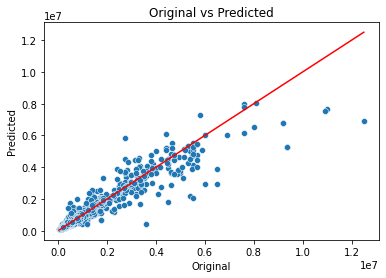

In [81]:
#ploting original output vs predicted output using scatterplot
original = final_model["y_test"]
predicted = final_model["y_predict"]
sns.scatterplot(original,predicted)
plt.title("Original vs Predicted")
plt.xlabel("Original")
plt.ylabel("Predicted")

p1 = max(max(original),max(predicted))
p2 = min(min(original),min(predicted))
plt.plot([p1,p2],[p1,p2],'r-')
plt.show()

### Final Remarks:
>Final model **KNeighborsRegressor** performs better with **R2 Score: 90.76% and Cross Val Score: 84.31%** and can further be improved by training with more specific data.

## Preprocessing Pipeline

To get the prediction from this model, following preprocessing needs to be followed:
1. **Load Dataset**
2. **Perform Data Cleansing as follows:**
	- Extract numbers from `Driven Kilometers` and store it as float64 type.
	- Rename columns as *{"Manufacture Year":"ManufactureYear","Driven Kilometers":"DrivenKilometers","Number of Owner":"NumberOfOwner","Body Type":"BodyType"}*
	- Convert all the object type features to lower case.
	- Change the data type of `Manufacture Year` from *int64 to float46*.
    
    
3. **Encode descrete features using pandas *get_dummies()* function**.
4. **Remove outliers using scipy.stats *zscore()* function keeping threshold -3 to +3 and % of data loss <=5%**.
5. **Seperate input and output variables**.
6. **Treat skewness in continuous features using sklearn.preprocessing *power_transform()* function**.
7. **Scale continuous features using sklearn.preprocessing *StandardScaler()* function**.
8. **Apply decomposition on input variables using sklearn.decomposition *PCA***.
9. **Load saved or serialized model using *joblib.load()* and predict values**. 

### ______EOF__